In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_8873/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("../data/marketing_campaign.csv", sep=";")

**Easy**

In [4]:
complains_count = df["Complain"].sum()
complains_count

21

In [5]:
average_dob_overall = int(df["Year_Birth"].mean()) # dates of birth
average_age_oveall = 2024 - average_dob_overall


df["purchase_count"] = df["MntWines"] +  df["MntFruits"] + df["MntMeatProducts"]
df["purchase_count"] += df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

average_dob_with_purchases_overall = int(df[df["purchase_count"] > 0]["Year_Birth"].mean())
average_dob_with_purchases_overall = 2024 - average_dob_with_purchases_overall

print(average_age_oveall, average_dob_with_purchases_overall)

56 56


as we can see, average ages isn't distinct, all users had made some purchases

**Medium**

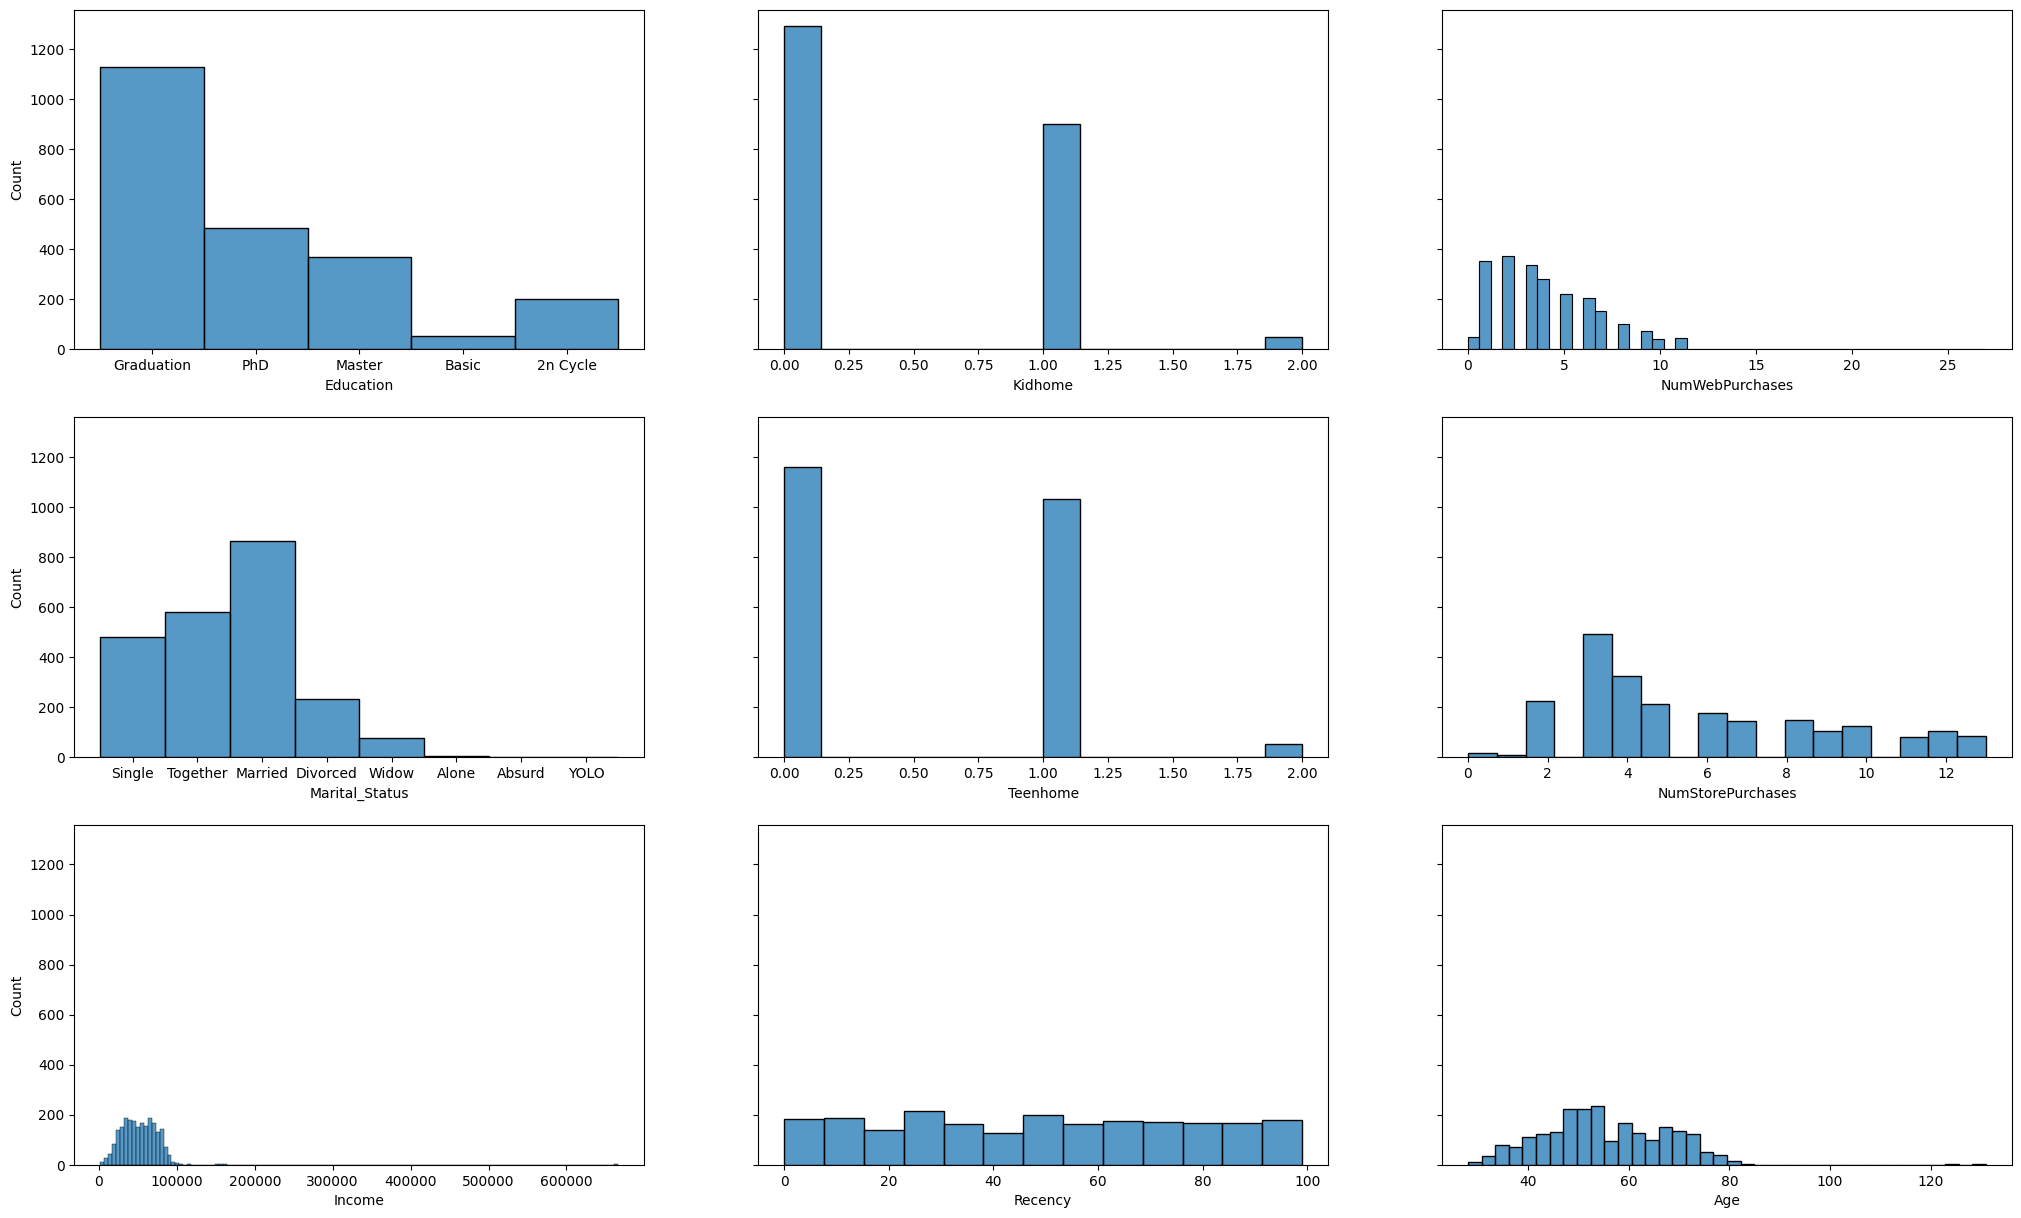

In [6]:
df["Age"] = 2024 - df["Year_Birth"]
columns = ["Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "Recency", "NumWebPurchases", "NumStorePurchases", "Age"]
fig, axes = plt.subplots(3, 3, figsize=(25, 15), sharey=True)

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axes[i%3, i//3])

plt.show()

mainly, there are middle age people with graduation degree, married, mostly having no children or one

lets take a look at some column dependencies

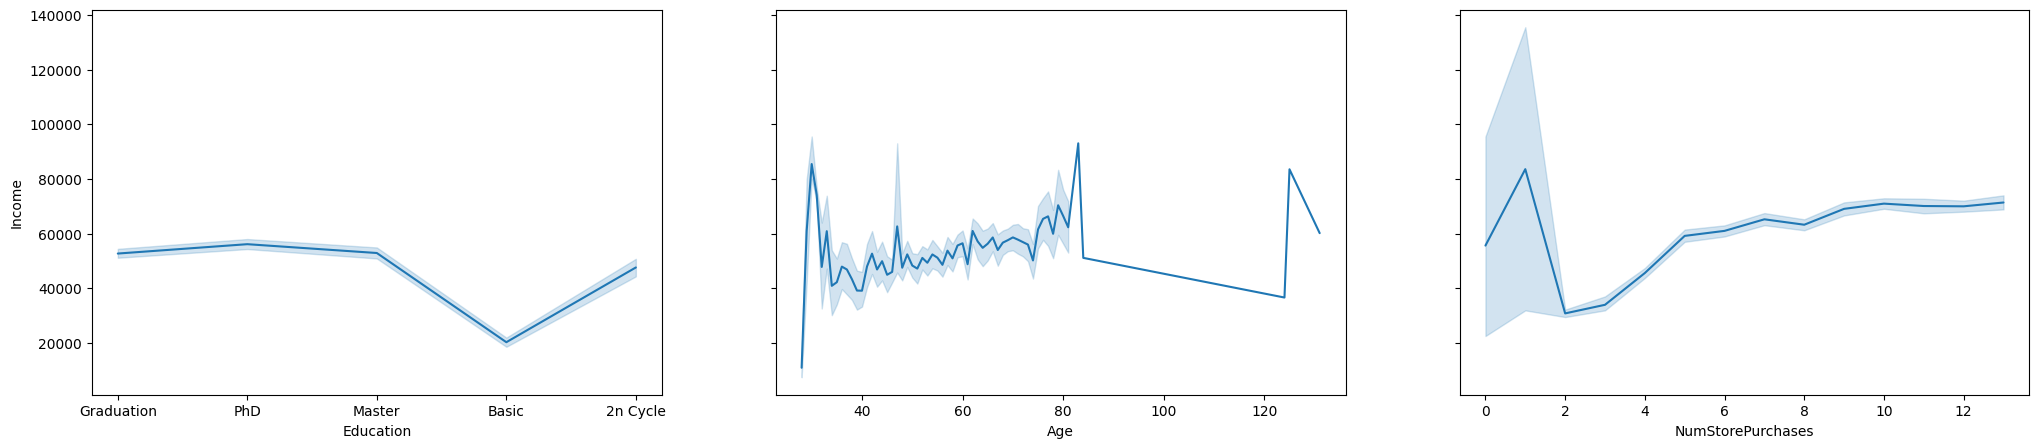

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df, x="Education", y="Income", ax=axes[0])
sns.lineplot(data=df, x="Age", y="Income", ax=axes[1])
sns.lineplot(data=df, x="NumStorePurchases", y="Income", ax=axes[2])
plt.show()



here we can see, what 
* people with PhD have largest average income
* people about 80s have largest average income (wow)
* income is increasing as long as number of purchases is growing :)

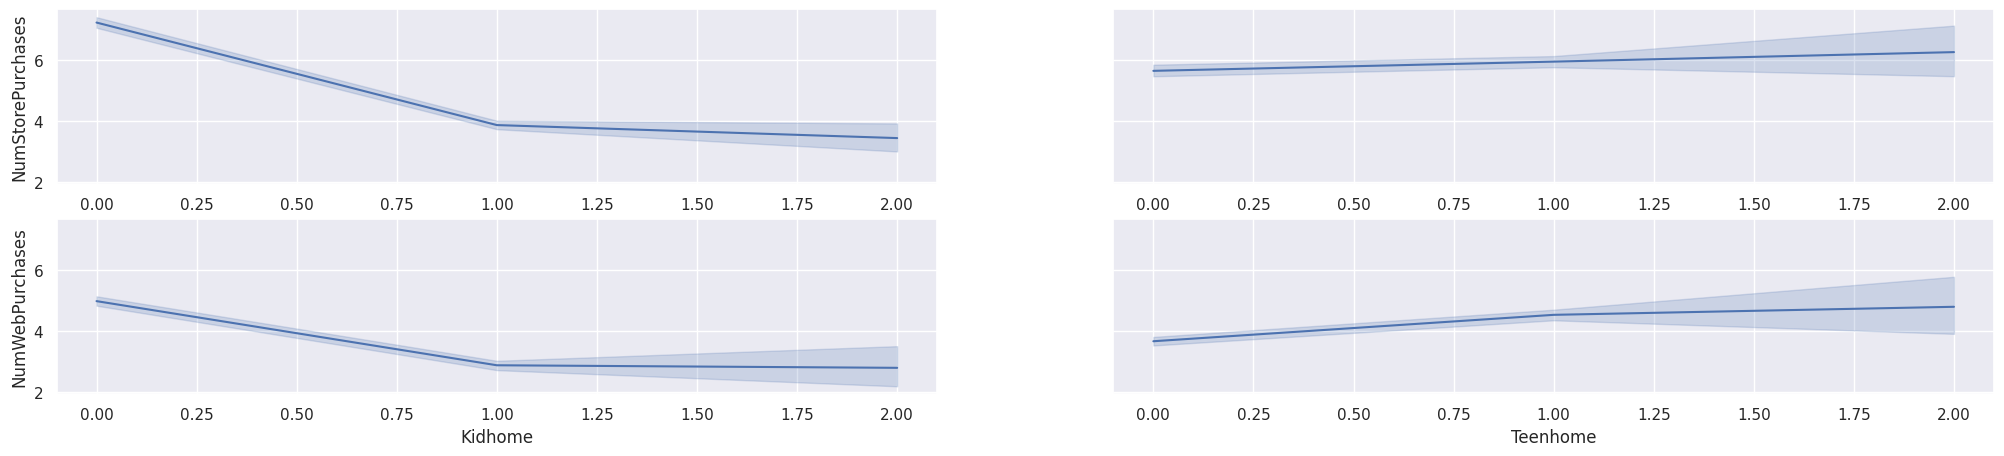

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(25, 5), sharey=True)
sns.lineplot(data=df, x="Kidhome", y="NumStorePurchases", ax=axes[0, 0])
sns.lineplot(data=df, x="Teenhome", y="NumStorePurchases", ax=axes[0, 1])
sns.lineplot(data=df, x="Kidhome", y="NumWebPurchases", ax=axes[1, 0])
sns.lineplot(data=df, x="Teenhome", y="NumWebPurchases", ax=axes[1, 1])
plt.show()

here we see what people with small children have a small average count of purchases.
the presence of teenage children does not particularly affect the number of purchases

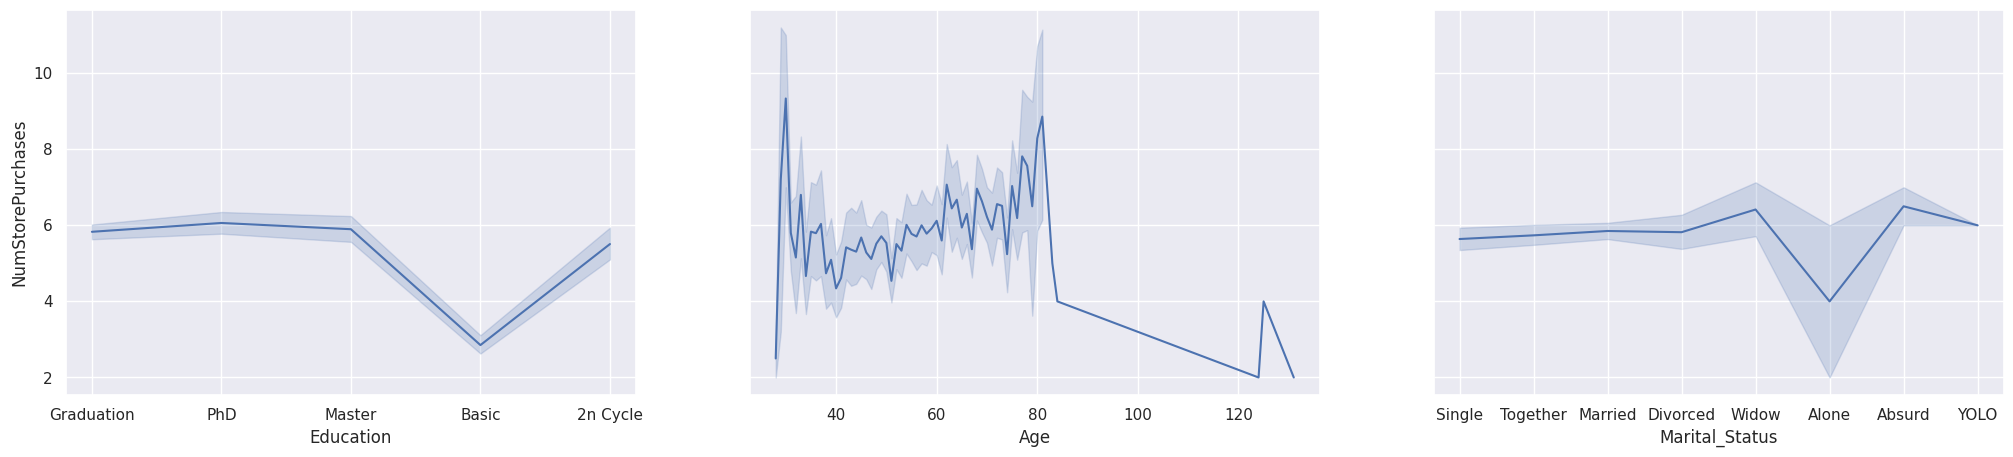

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)
sns.lineplot(data=df, x="Education", y="NumStorePurchases", ax=axes[0])
sns.lineplot(data=df, x="Age", y="NumStorePurchases", ax=axes[1])
sns.lineplot(data=df, x="Marital_Status", y="NumStorePurchases", ax=axes[2])
plt.show()

here we can see, what 
* people with PhD & Master degree are the main buyers
* young & old people are the main buyers of goods
* alone people buy not so many goods

**Hard**

target audience - those people who have a large number of NumStorePurchases or NumWebPurchases.
note that the number of purchases is practically the same both offline and online, 
not depending on most characteristics of people without martial status.
alone & YOLO people make more web purchases than offline purchases (plots are below)

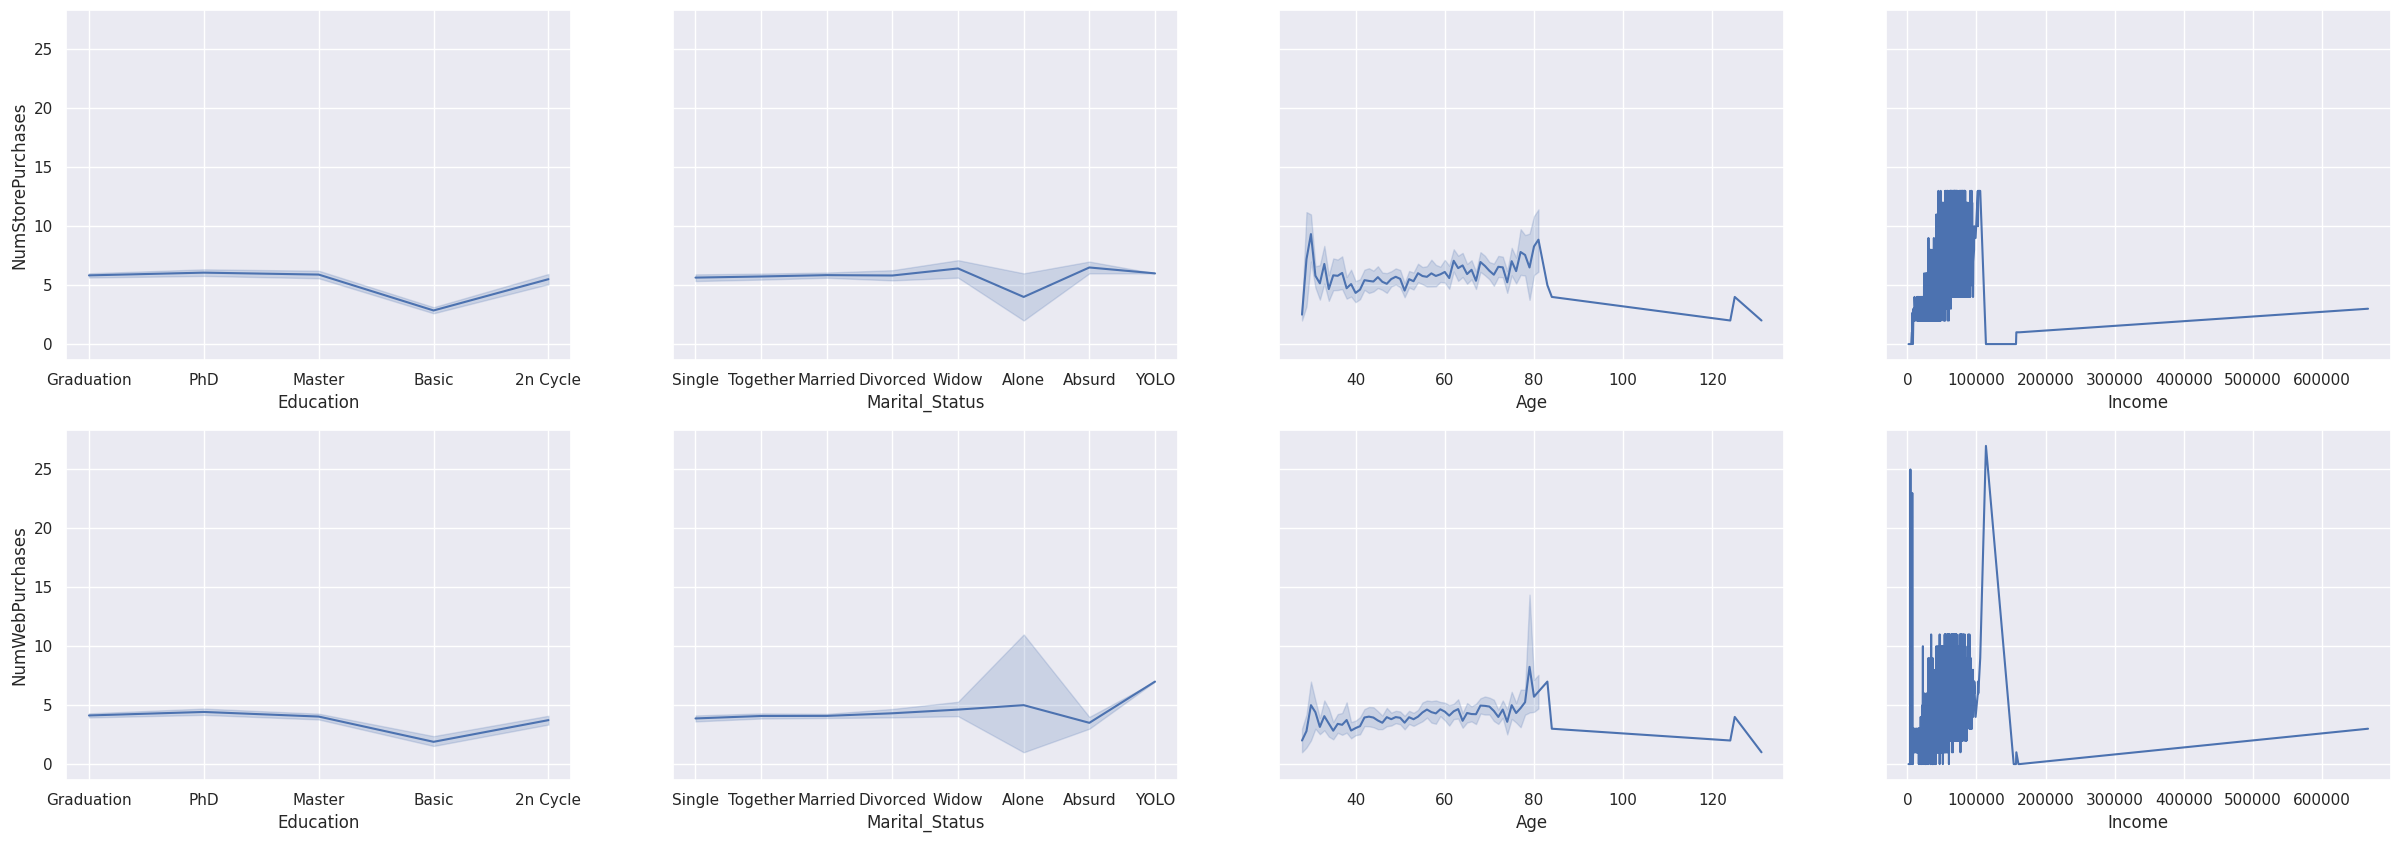

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(30, 10), sharey=True)
sns.lineplot(data=df, x="Education", y="NumStorePurchases", ax=axes[0, 0])
sns.lineplot(data=df, x="Marital_Status", y="NumStorePurchases", ax=axes[0, 1])
sns.lineplot(data=df, x="Age", y="NumStorePurchases", ax=axes[0, 2])
sns.lineplot(data=df, x="Income", y="NumStorePurchases", ax=axes[0, 3])

sns.lineplot(data=df, x="Education", y="NumWebPurchases", ax=axes[1, 0])
sns.lineplot(data=df, x="Marital_Status", y="NumWebPurchases", ax=axes[1, 1])
sns.lineplot(data=df, x="Age", y="NumWebPurchases", ax=axes[1, 2])
sns.lineplot(data=df, x="Income", y="NumWebPurchases", ax=axes[1, 3])

plt.show()

now lets take a look at online/offline purchses and income dependencies

<Axes: xlabel='NumWebPurchases', ylabel='Income'>

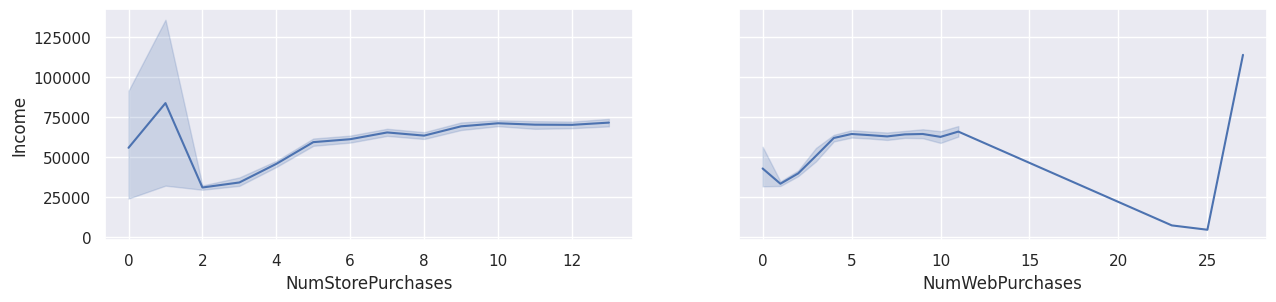

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharey=True)
sns.lineplot(data=df, x="NumStorePurchases", y="Income", ax=axes[0])
sns.lineplot(data=df, x="NumWebPurchases", y="Income", ax=axes[1])

* people with very high average incomes do a lot of online shopping
* a strong positive correlation between offline purchases and income

Totally, we r intresting in people with PhD or Master degrees, middle 70s, without young children and with large income.

In [12]:
# conditions
education_c = (df["Education"] == "PhD") | (df["Education"] == "Master")
age_c = (70 < df["Age"]) & (df["Age"] < 85)
income_c = df["Income"] > 60000
kids_c = df["Kidhome"] == 0

target_audience = df[education_c & age_c & income_c & kids_c]
ids_of_target_audience = target_audience["ID"]

list(ids_of_target_audience)

[2114,
 6565,
 8755,
 6518,
 9370,
 7055,
 9260,
 10314,
 10562,
 6274,
 6142,
 7106,
 6932,
 716,
 3711,
 9504,
 895,
 1907,
 4149,
 1173,
 3867,
 3336,
 6255,
 5682,
 1915,
 6543,
 9930,
 7922,
 8952,
 4475,
 3412,
 9855,
 7718,
 158,
 7712,
 8402,
 4530,
 8233,
 202,
 4261,
 9298,
 9952,
 3859,
 4676,
 7881,
 737,
 8584,
 6906,
 6715,
 1570,
 4619,
 4994,
 2878,
 6428,
 6248,
 7861,
 3945,
 7899,
 6544,
 8659,
 11181,
 9589]